In [20]:
import sys
import os

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import numpy as np

sys.path.append(os.getcwd())
from load_data import *
from plotting_tools import *

sys.path.append('../3_score/')
from optimize import Scores

/home/jbelk/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [21]:
receptor = 'CHK1'#AR B2AR CDK2 CHK1 HSP90 LPXC TRMD

data_set_dir = '/scratch/PI/rondror/docking_data/'+receptor+'/'
   
rmsd_file = 'rmsd.csv'
ligands_dir = data_set_dir + 'ligands/'
grids_dir = data_set_dir + 'grids/'
glide_dir = data_set_dir + 'glide/'
crystal_fp_file = data_set_dir + 'crystal_ifp_july9/ifp.fp'
docking_fp_dir = data_set_dir + 'glide_ifp_july9/'

#crystal_fp_file2 = data_set_dir + 'crystal_ifp_july8_2/ifp.fp'
#docking_fp_dir2 = data_set_dir + 'glide_ifp_july8_2/'

In [22]:
## useful class specifications:
# Ligand -- attributes: crystal (currently not used/none), poses (dict of pose_num:pose).
# Pose -- attributes: rmsd (float), fp (Fingerprint, num (integer), gscore (float)
# FuzzyFingerPrint -- attributes: pdb, feats (dict of residue name:interaction list).

# crystals: maps structures to Poses, 
#           e.g., crystals['4LDO'] = Pose(rmsd=0, fingerprint, num=0, gscore=0)
# glides:   maps ligand_struct, grid_struct to Ligands, 
#           e.g., glides['4LDO']['4LDO'] = Ligand(...)
w1 = [10,10,10,1,0]
w2 = [10,10,0,0,1]
## STEP 1:
## load in the crystal structures, docking results, and fingerprints
(crystals, glides) = load_data(
    data_set_dir, rmsd_file, ligands_dir, grids_dir, glide_dir, crystal_fp_file, docking_fp_dir,w=w1)

#(crystals2, glides2) = load_data(
#    data_set_dir, rmsd_file, ligands_dir, grids_dir, glide_dir, crystal_fp_file, docking_fp_dir,w=w2)

Found 13 grids
Found 13 ligands
Loading crystal structures...
Loading docking results...
Loading glidescores...
All ligands and structures successfully docked. Nice!
Loading rmsds...
All ligands successfully fingerprinted. Nice!


50
1.63082248521


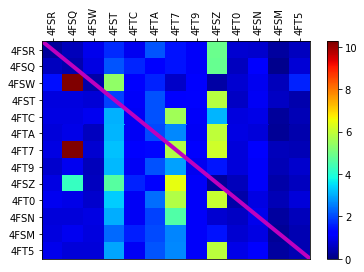

In [23]:
## STEP 2:
## visualize docking results

# in the heatmaps, each row is a structure and each column is a ligand

get_ipython().magic(u'matplotlib inline')

max_num_poses = 50
for n in [50]:#1,10,50,100,150]:
    print n
# this shows the rmsds of glide's top ranked poses (pose 0)
#top_rmsd_matrix = top_pose(glides)
#heatmap(top_rmsd_matrix, glides)

# this shows the lowest rmsd in the first 'max_num_poses' poses
    best_rmsd_matrix = best_pose(glides, 50)
    print np.mean(best_rmsd_matrix)
    heatmap(best_rmsd_matrix, glides)

In [24]:
## STEP 3:
## pick 1 receptor structure to use for all ligands
## filter ligands that are poorly docked

rmsd_filter = lambda x: x < 2
best_structure, filtered_ligands, ave_rmsd = get_structure_and_ligands(best_rmsd_matrix, rmsd_filter, glides.keys())

print 'The best structure is ' + best_structure
print str(len(filtered_ligands)) + ' of ' + str(len(glides.keys())) + ' ligands were docked well:'
print filtered_ligands
print 'with an average best rmsd of ' + str(ave_rmsd)[:5]

The best structure is 4FSR
11 of 13 ligands were docked well:
['4FSR', '4FSQ', '4FSW', '4FST', '4FTC', '4FT7', '4FT9', '4FT0', '4FSN', '4FSM', '4FT5']
with an average best rmsd of 0.854


In [25]:
## STEP 4:
## score all pairs of ligands

scores = Scores(glides, crystals, filtered_ligands, best_structure, max_num_poses)
#scores2 = Scores(glides2, crystals2, filtered_ligands, best_structure, max_num_poses)

In [ ]:
#plot_magnitudes(scores2, receptor)

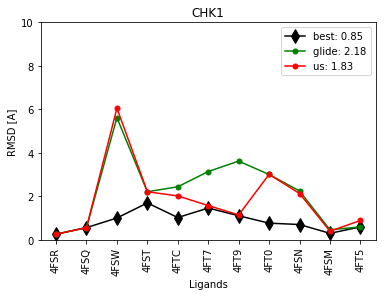

Our average rmsd:  1.834
Best possible average rmsd:  0.854818181818
Glide's average rmsd:  2.18945454545


In [26]:
## STEP 5:
## plot results

# final_rmsds maps a ligand to its final_rmsd
final_rmsds = plot_final_rmsds(scores,receptor)#,scores2,'new vdw: ')

print 'Our average rmsd: ', sum([i[1] for i in final_rmsds])/float(len(final_rmsds))
print 'Best possible average rmsd: ', sum([i[2] for i in final_rmsds])/float(len(final_rmsds))
print 'Glide\'s average rmsd: ', sum([i[3] for i in final_rmsds])/float(len(final_rmsds))

In [27]:
(worst_lig, worst_rmsd, b, c) = final_rmsds[np.argmax([i[1] for i in final_rmsds])]
print worst_lig, worst_rmsd, b, c

4FSW 6.044 0.997 5.611


In [28]:
worst_lig = '2R3H'

for worst_lig in filtered_ligands:
    print worst_lig
    final_scores = scores.get_final_scores(worst_lig)[:-1]
    rmsds = scores.get_rmsds(worst_lig)[:-1]

    top_pose = np.argmax(final_scores)
    best_pose = np.argmin(rmsds)

    print 'Top pose: ' + str(top_pose) + '. Score: ' + str(final_scores[top_pose]) + '. RMSD: ' + str(rmsds[top_pose])
    print 'Best pose: ' + str(best_pose) + '. Score: ' + str(final_scores[best_pose]) + '. RMSD: ' + str(rmsds[best_pose])
    print 'Crystal pose score: ' + str(scores.get_final_scores(worst_lig)[-1])

#print rmsds
#print [glides[worst_lig][best_structure].poses[i].rmsd for i in range(50)]

4FSR
Top pose: 0. Score: 985.385461079. RMSD: 0.252
Best pose: 0. Score: 985.385461079. RMSD: 0.252
Crystal pose score: 990.409600254
4FSQ
Top pose: 0. Score: 785.18266952. RMSD: 0.554
Best pose: 0. Score: 785.18266952. RMSD: 0.554
Crystal pose score: 793.32375041
4FSW
Top pose: 5. Score: 631.953588186. RMSD: 6.044
Best pose: 8. Score: 554.496449832. RMSD: 0.997
Crystal pose score: 558.827847532
4FST
Top pose: 0. Score: 870.370383964. RMSD: 2.204
Best pose: 47. Score: 827.770500555. RMSD: 1.689
Crystal pose score: 856.061761745
4FTC
Top pose: 4. Score: 774.4720829. RMSD: 2.011
Best pose: 18. Score: 745.849037152. RMSD: 1.018
Crystal pose score: 782.12596376
4FT7
Top pose: 21. Score: 798.295379969. RMSD: 1.57
Best pose: 30. Score: 770.543753902. RMSD: 1.455
Crystal pose score: 826.064256733
4FT9
Top pose: 1. Score: 764.43113579. RMSD: 1.139
Best pose: 7. Score: 738.870393134. RMSD: 1.1
Crystal pose score: 781.292497599
4FT0
Top pose: 1. Score: 930.041839497. RMSD: 3.005
Best pose: 17. S

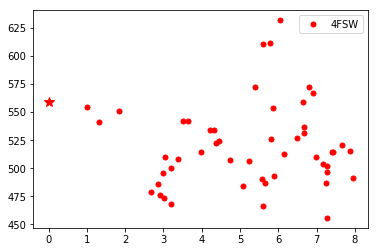

In [29]:
worst_lig='4FSW'

## STEP 6:
## look at the final scores for all poses of the worst ligand

## for our method to work repeatably and reliably,
## there needs to be a strong correlation in these plots

plot_scores_vs_rmsds(worst_lig, scores, lab=worst_lig)#, scores2=scores2, lab2='new h')

In [30]:
fp = glides[worst_lig][best_structure].poses[best_pose].fp.feats

for res in sorted(map(int,fp.keys())):
    thresh = [i**2 if i**2 > 0.1 else 0 for i in fp[str(res)]]
    if any(thresh):
        print res, thresh

13 [0, 0, 0, 0.16479705486799998, 0]
14 [0, 0, 0, 0.237171088281, 0]
15 [0, 0, 0, 7.6957296044300012, 0]
16 [0, 0, 0, 0.69342340084900012, 0]
17 [0, 0, 0, 0.18844643261499999, 0]
22 [0, 0, 0, 0.142086199169, 0]
23 [0, 0, 0, 4.1142350291800005, 0]
24 [0, 0, 0, 0.28770834236499992, 0]
25 [0, 0, 0, 0.36608550004500001, 0]
35 [0, 0, 0, 0.18070457814999999, 0]
36 [0, 0, 0, 1.8357745286800002, 0]
37 [0, 0, 0, 0.26080029598300003, 0]
38 [0, 0, 0, 0.84072834463900004, 0]
68 [0, 0, 0, 0.52683160982999999, 0]
82 [0, 0, 0, 0.11784801527999998, 0]
84 [0, 0, 0, 1.1783317942, 0]
85 [0, 0.54416310005000001, 0, 0.97729949476599998, 0]
86 [0, 0, 0, 3.7858032261299996, 0]
87 [9.1634152360700014, 0, 0, 3.3695145906599997, 0]
88 [0, 0, 0, 0.55048251448100005, 0]
89 [0, 0, 0, 0.31168270112399993, 0]
90 [0, 0, 0, 2.1477877519499997, 0]
91 [0, 0.69099929591900022, 0, 2.9349216830299998, 0]
94 [0, 0, 0, 0.12551459340900001, 0]
134 [0, 0, 0, 0.33281594608199999, 0]
135 [0, 0, 0, 0.37179484383199995, 0]
136 [0,

In [31]:
fp = glides[worst_lig][best_structure].poses[top_pose].fp.feats

for res in sorted(map(int,fp.keys())):
    thresh = [i**2 if i**2 > 0.1 else 0 for i in fp[str(res)]]
    if any(thresh):
        print res, thresh

13 [0, 0, 0, 0.113832776272, 0]
14 [0, 0, 0, 0.17711252576700004, 0]
15 [0, 0, 0, 6.4598160006899992, 0]
16 [0, 0, 0, 0.74633633398800003, 0]
17 [0, 0, 0, 0.16537869926899998, 0]
22 [0, 0, 0, 0.13525364519300004, 0]
23 [0, 0, 0, 4.1693579908699991, 0]
24 [0, 0, 0, 0.31219233953400005, 0]
25 [0, 0, 0, 0.37454227404000001, 0]
35 [0, 0, 0, 0.24054722557200001, 0]
36 [0, 0, 0, 2.3849832006899998, 0]
37 [0, 0, 0, 0.32028538073400004, 0]
38 [0, 0, 0, 0.98177860701499986, 0]
55 [0, 0, 0, 0.10306407724399999, 0]
68 [0, 0, 0, 1.3857097292699998, 0]
69 [0, 0, 0, 0.12445830096800001, 0]
82 [0, 0, 0, 0.17019932932000001, 0]
83 [0, 0, 0, 0.112840559157, 0]
84 [0, 0, 0, 2.5611235673499997, 0]
85 [0, 1.0081233432099996, 0, 1.5672570987000003, 0]
86 [0, 0, 0, 3.8681596058399998, 0]
87 [0, 0, 0, 3.3282252885600005, 0]
88 [0, 0, 0, 0.48457167957200004, 0]
89 [0, 0, 0, 0.197965941058, 0]
90 [0, 0, 0, 1.23215298574, 0]
91 [0, 0, 0, 1.5020532836599998, 0]
134 [0, 0, 0, 0.26294983980600001, 0]
135 [0, 0, 0,

In [ ]:
fp = crystals[worst_lig].fp.feats

for res in sorted(fp.keys()):
    print res, [i if abs(i) > 0.1 else 0 for i in fp[res]]

In [ ]:
## STEP 7: 
## look through pairs involving worst_lig

l1 = worst_lig
#(l2, next_worst_rmsd, b, c) = final_rmsds[np.argmax([i[1] if i[1] != worst_rmsd else 0 for i in final_rmsds])]
l2 = '3V49'
print l1, l2

In [ ]:
## STEP 8: debug the worst pair

get_ipython().magic(u'matplotlib inline')

plot_all_poses(l1, l2, scores2, l1 + ' ' + l2)#, scores2, 'new')

In [ ]:
## use this block to extract interesting pairs from the plot above

# l1 pose num, l2 pose num, rmsd1, rmsd2, score

bad_rmsd = lambda r1,r2: (r1+r2)/2.0 >= 2
good_rmsd = lambda r1,r2: (r1+r2)/2.0 <= 2
good_score = lambda score: score >= 50
combo = lambda rmsd, score: score and rmsd

# output: p1, p2, r1, r2, score(p1,p2)
bad_pairs = scores.get_filtered_pose_pairs(l1, l2, bad_rmsd, good_score, combo)
bad_pairs.sort(key=lambda x: x[4])
bad_pairs.reverse()

good_pairs = scores.get_filtered_pose_pairs(l1, l2, good_rmsd, good_score, combo)
good_pairs.sort(key=lambda x: x[4])
good_pairs.reverse()

print l1, l2
print 'Bad pairs:'
for i in range(min(5, len(bad_pairs))):
    print bad_pairs[i]
print 'Good pairs:'
for i in range(min(5, len(good_pairs))):
    print good_pairs[i]

In [ ]:
(bad_score,  bad_interactions)  = scores.get_interactions(l1, l2, bad_pairs[0][0],  bad_pairs[0][1])
(good_score, good_interactions) = scores.get_interactions(l1, l2, good_pairs[0][0], good_pairs[0][1])
(true_score, true_interactions) = scores.get_interactions(l1, l2, -1, -1)

# returns list of tuples: (arg1_strength - arg2_strenth, res, interaction_type)
explore_1 = scores.find_mismatched_interactions(true_interactions, good_interactions)
explore_2 = scores.find_mismatched_interactions(true_interactions, bad_interactions)

explore_1.sort(key=lambda x: abs(x[0]), reverse=True) # sort on absolute value of the mismatch
explore_2.sort(key=lambda x: x[0])

print 'Biggest mismatches between the good pose and the crystal pose'
for i in range(10):
    print explore_1[i]
print '--------'
print 'Biggest negative mismatches between the bad pose and the crystal pose'
for i in range(10):
    print explore_2[i]

In [ ]:
#print crystals.keys()
for res in crystals['3V4A'].fp.feats.keys():
    print res, [i if abs(i) > .01 else 0 for i in crystals['3V4A'].fp.feats[res]]